# Additional Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import calendar

pd.set_option('display.max_rows', 400)
pd.set_option('max_colwidth', 80)
pd.set_option('display.max_columns', None)

In [2]:
og = pd.read_pickle('./datasets/main.pickle')

In [3]:
full = pd.read_csv('./datasets/full_processed_re.csv')

In [4]:
full.columns

Index(['newsdesk', 'section', 'subsection', 'material', 'headline', 'abstract',
       'keywords', 'word_count', 'pub_date', 'is_popular', 'uniqueID',
       'boxcox_word', 'day_of_month', 'day_of_week', 'hour', 'is_weekend',
       'is_primehour', 'group_date', 'posts_per_day', 'n_keywords',
       'ideal_n_keywords', 'combi_text', 'combi_text2', 'is_trump', 'is_party',
       'is_re', 'is_racial', 'is_covid', 'is_epidemic', 'is_death',
       'headline_question', 'abs_question', 'pos', 'neu', 'neg', 'compound',
       'headline_len', 'abstract_len', 'head_abs_len', 'newsdesk_box',
       'section_box', 'subsection_log', 'is_interactive', 'n_comments'],
      dtype='object')

In [5]:
full['n_comments'] = og['n_comments']

In [6]:
full['is_popular'] = full['n_comments'].apply(lambda x: 1 if x > 90 else 0)

In [7]:
# Transforming back into list
full['keywords'] = full['keywords'].fillna('[]')
full['keywords'] = full['keywords'].str.replace('^\[|\]$', '', regex=True)
full['keywords'] = full['keywords'].str.replace('\'', '', regex=True).str.split(', ')

In [8]:
full['ymd'] = full['pub_date'].apply(lambda x: str(x)[:10])
full['ymd'] = pd.to_datetime(full['ymd'])

In [9]:
full['month'] = full['ymd'].apply(lambda x: x.month)
full['week'] = full['ymd'].apply(lambda x: x.week)
full['day'] = full['ymd'].apply(lambda x: x.day)

In [10]:
full['is_popular'] = full['n_comments'].apply(lambda x: 1 if x > 90 else 0)

## Day & Month

In [11]:
g1_data = full.groupby('ymd').sum().reset_index()
g1_data.head()

,ymd,word_count,is_popular,boxcox_word,day_of_month,day_of_week,hour,is_weekend,is_primehour,posts_per_day,n_keywords,ideal_n_keywords,is_trump,is_party,is_re,is_racial,is_covid,is_epidemic,is_death,headline_question,abs_question,pos,neu,neg,compound,headline_len,abstract_len,head_abs_len,newsdesk_box,section_box,subsection_log,is_interactive,n_comments,month,week,day
0,2020-01-01,38198,10,1283.350328,27,54,333,0,3,729,176,3,2,0,3,0,0,0,1,4,0,2.592,23.352,1.057,4.5342,1458,3180,4638,713.264106,711.780977,33.199250,1,3139,27,27,27
1,2020-01-02,58509,26,2199.994320,90,135,603,0,5,2025,271,7,5,2,0,2,0,0,0,9,3,4.136,36.545,4.317,-1.8182,2401,5394,7795,1293.503867,1230.544301,110.840100,0,13718,45,45,90
2,2020-01-03,56478,22,2135.775021,147,196,558,0,6,2401,306,6,9,3,2,1,0,0,1,8,6,5.300,38.448,5.252,-0.3310,2543,6008,8551,1271.667862,1387.977261,186.617258,4,16996,49,49,147
3,2020-01-04,22405,13,828.898454,68,85,211,17,4,289,117,4,7,1,1,0,0,0,1,2,2,1.581,13.347,2.071,-2.3879,740,1808,2548,493.220653,518.828607,47.290158,0,10099,17,17,68
4,2020-01-05,24266,13,894.766180,90,108,281,18,2,324,136,4,5,1,1,1,0,0,0,1,1,1.325,14.394,2.282,-3.7038,986,2134,3120,531.136507,548.547985,44.515357,0,6424,18,18,90


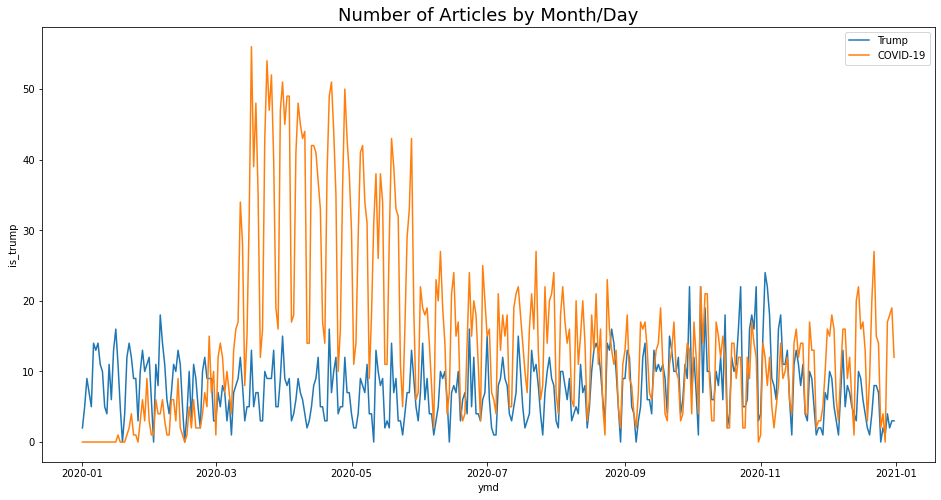

In [12]:
# TO PUT IN EDA (news cycle is cylical)
plt.figure(figsize=(16,8))
sns.lineplot(data=g1_data, x='ymd', y='is_trump', label='Trump')
sns.lineplot(data=g1_data, x='ymd', y='is_covid', label='COVID-19')
plt.legend()
plt.title('Number of Articles by Month/Day', fontsize=18);

## Week

In [13]:
g2_data = full.groupby('week').sum().reset_index()
g2_data.head()

,week,word_count,is_popular,boxcox_word,day_of_month,day_of_week,hour,is_weekend,is_primehour,posts_per_day,n_keywords,ideal_n_keywords,is_trump,is_party,is_re,is_racial,is_covid,is_epidemic,is_death,headline_question,abs_question,pos,neu,neg,compound,headline_len,abstract_len,head_abs_len,newsdesk_box,section_box,subsection_log,is_interactive,n_comments,month,day
0,1,199856,84,7342.784302,422,578,1986,35,20,5768,1006,24,28,7,7,4,0,0,3,24,12,14.934,126.086,14.979,-3.7067,8128,18524,26652,4302.792996,4397.679131,422.462124,5,50376,156,422
1,2,418925,176,15610.553074,2729,767,3946,37,47,17675,2347,35,71,30,12,11,0,1,5,39,24,28.895,266.241,31.857,-9.1165,17511,40371,57882,9584.990910,9150.210088,1171.334427,5,106718,327,2729
2,3,374143,176,14664.775035,5062,733,4148,28,49,19261,2314,37,62,43,13,13,1,1,5,41,27,31.759,273.742,27.499,14.9894,17320,40649,57969,9281.507563,9386.015999,1182.175338,19,93231,333,5062
3,4,382060,154,14572.577645,7078,798,3746,37,53,16996,2210,28,63,44,17,19,9,8,2,41,27,28.037,258.419,27.538,1.4398,16457,38743,55200,8901.181645,8777.893656,1161.981323,6,89980,314,7078
4,5,431109,167,16199.054792,9135,812,4256,32,53,20219,2490,34,62,44,17,15,26,18,5,49,28,30.133,285.079,29.793,0.8708,17929,42237,60166,9872.755689,9623.247095,1236.939692,8,104811,377,9135


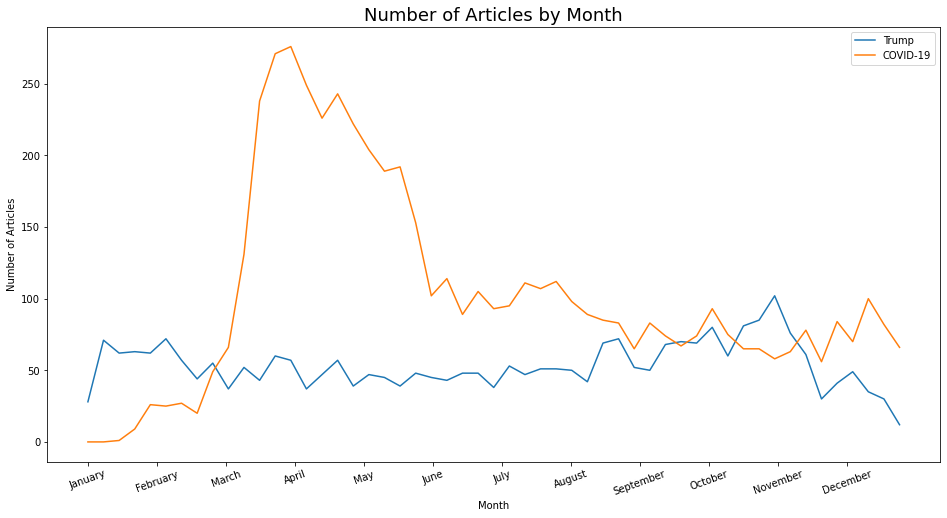

In [14]:
plt.figure(figsize=(16,8))
sns.lineplot(data=g2_data, x='week', y='is_trump', label='Trump')
sns.lineplot(data=g2_data, x='week', y='is_covid', label='COVID-19')
plt.ylabel('Number of Articles')
#plt.xticks(np.arange(1, 54, 4))
plt.xticks(np.arange(1, 54, 4.42), calendar.month_name[1:13], rotation=20)
plt.legend()
plt.xlabel('Month')
plt.title('Number of Articles by Month', fontsize=18);

## Month

In [15]:
g3_data = full.groupby('month').sum().reset_index()
g3_data.head()

,month,word_count,is_popular,boxcox_word,day_of_month,day_of_week,hour,is_weekend,is_primehour,posts_per_day,n_keywords,ideal_n_keywords,is_trump,is_party,is_re,is_racial,is_covid,is_epidemic,is_death,headline_question,abs_question,pos,neu,neg,compound,headline_len,abstract_len,head_abs_len,newsdesk_box,section_box,subsection_log,is_interactive,n_comments,week,day
0,1,1770404,736,66937.811208,24382,3516,17645,137,215,79375,10162,154,280,158,64,60,34,26,19,191,118,131.617,1182.819,128.555,6.2772,75975,176936,252911,41011.658550,40369.914432,5026.187354,43,425107,4630,24382
1,2,1633855,652,61649.842958,20053,3188,15905,150,171,73688,8986,130,231,168,67,65,122,66,23,184,127,118.854,1070.142,122.982,-19.6331,67688,158943,226631,37418.627685,36594.015645,4706.374333,27,465419,9719,20053
2,3,2064109,782,77031.641204,27159,3704,20401,184,196,102518,11234,141,219,131,60,53,805,146,44,203,121,147.734,1355.114,141.162,18.1082,88188,202066,290254,45837.456451,45449.690902,4800.810962,47,520948,19321,27159
3,4,2230560,821,79368.091421,25936,3970,20163,169,169,107266,11535,193,205,71,69,46,1063,128,101,236,127,139.388,1373.417,153.207,-51.2735,89800,206098,295898,46820.265148,46441.099407,4613.653500,45,480799,26700,25936
4,5,2003436,694,72602.094952,23873,3959,18481,199,150,92176,10986,194,187,61,73,73,793,72,91,196,108,134.272,1269.564,134.147,0.8841,80761,191252,272013,43686.394051,42879.850552,4318.095107,51,421126,31188,23873


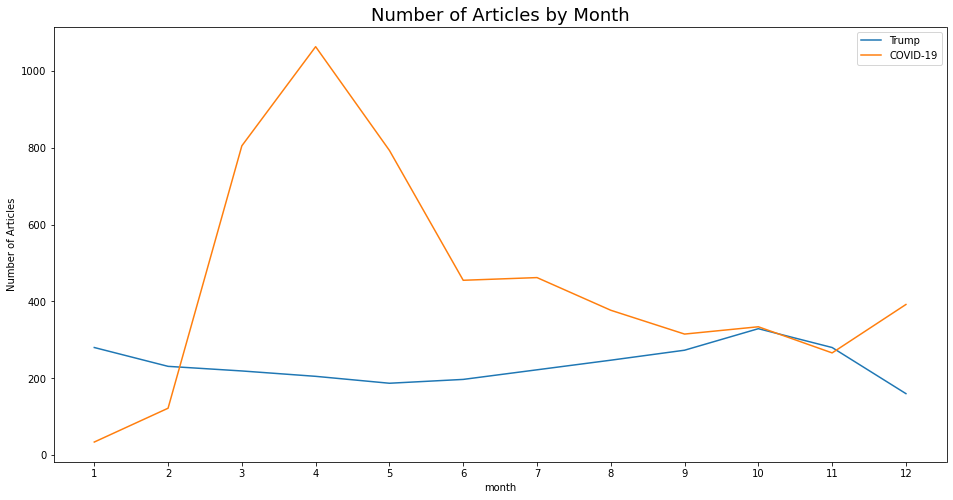

In [16]:
plt.figure(figsize=(16,8))
sns.lineplot(data=g3_data, x='month', y='is_trump', label='Trump')
sns.lineplot(data=g3_data, x='month', y='is_covid', label='COVID-19')
plt.ylabel('Number of Articles')
plt.xticks(np.arange(1, 13, 1))
plt.legend()
plt.title('Number of Articles by Month', fontsize=18);

## Day of Month

In [17]:
g4_data = full.groupby('day').sum().reset_index()
g4_data.head()

,day,word_count,is_popular,boxcox_word,day_of_month,day_of_week,hour,is_weekend,is_primehour,posts_per_day,n_keywords,ideal_n_keywords,is_trump,is_party,is_re,is_racial,is_covid,is_epidemic,is_death,headline_question,abs_question,pos,neu,neg,compound,headline_len,abstract_len,head_abs_len,newsdesk_box,section_box,subsection_log,is_interactive,n_comments,month,week
0,1,655295,236,25454.763609,495,1173,5917,68,60,25419,3562,46,75,42,29,44,155,13,8,58,32,44.017,406.801,44.183,-0.0014,25656,63622,89278,12731.440368,12038.112015,1384.509685,6,159358,3347,12860
1,2,758227,287,30156.797762,1164,1276,7213,47,62,33804,4122,70,94,42,28,41,176,20,8,78,35,52.482,479.862,49.656,11.6900,31282,73171,104453,14705.168403,13955.188550,1747.284041,13,160871,4028,15627
2,3,781354,277,29995.956157,1749,1376,6876,49,76,31343,4244,83,106,50,26,45,177,18,10,76,42,54.589,476.051,52.348,3.8758,31224,74404,105628,15152.078477,14572.230158,1909.517265,17,171573,3756,14515
3,4,670284,248,25815.590946,2008,1189,5945,60,74,25752,3602,62,83,46,26,30,145,14,13,48,32,46.612,411.462,43.911,11.4435,25999,62577,88576,13399.122741,12650.507939,1515.033305,6,154560,3259,12675
4,5,675176,255,26104.377707,2485,1296,6125,80,70,26995,3453,64,103,39,23,38,149,12,13,63,35,44.701,406.999,45.292,-3.0726,26063,63720,89783,13001.085585,12310.670249,1496.331018,10,171806,3147,12253


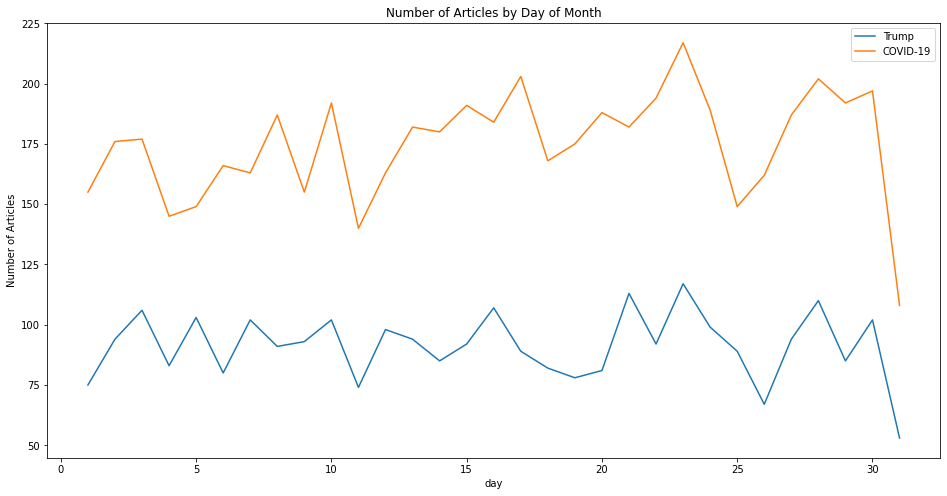

In [18]:
plt.figure(figsize=(16,8))
sns.lineplot(data=g4_data, x='day', y='is_trump', label='Trump')
sns.lineplot(data=g4_data, x='day', y='is_covid', label='COVID-19')
plt.ylabel('Number of Articles')
#plt.xticks(np.arange(1, 13, 1))
plt.legend()
plt.title('Number of Articles by Day of Month');

## Hour

In [19]:
g5_data = full.groupby('hour').sum().reset_index()
g5_data.head()

,hour,word_count,is_popular,boxcox_word,day_of_month,day_of_week,is_weekend,is_primehour,posts_per_day,n_keywords,ideal_n_keywords,is_trump,is_party,is_re,is_racial,is_covid,is_epidemic,is_death,headline_question,abs_question,pos,neu,neg,compound,headline_len,abstract_len,head_abs_len,newsdesk_box,section_box,subsection_log,is_interactive,n_comments,month,week,day
0,0,624971,412,27353.760106,8000,1221,49,533,29077,4638,83,252,131,5,64,164,28,17,62,27,51.247,418.718,63.028,-42.2777,27936,61499,89435,16957.887050,16804.182245,1876.810816,11,376499,3605,14937,8000
1,1,360776,233,15538.079080,5132,850,61,323,16683,2468,43,117,69,3,30,60,3,10,30,19,30.704,261.409,30.889,-1.5267,16759,40140,56899,8811.528314,9160.156828,1325.549281,20,165076,1960,8096,5132
2,2,315060,233,14012.005240,5075,745,29,318,18256,1482,107,47,19,0,16,42,9,1,21,10,30.488,262.760,24.749,12.4105,13089,30895,43984,8502.828088,7921.908670,894.564773,19,102295,1842,7603,5075
3,3,171025,146,8169.958980,3190,483,14,204,11512,990,59,25,16,0,14,40,2,3,12,7,18.374,170.232,15.397,0.7115,8960,22165,31125,4782.186481,4942.983248,552.311738,29,67278,1300,5385,3190
4,4,651819,152,17015.924972,4397,654,21,0,16267,1698,52,50,19,5,12,156,6,6,15,5,17.372,232.639,26.981,-33.8340,16004,38315,54319,7705.272986,7615.543736,785.691690,17,109869,1555,6397,4397


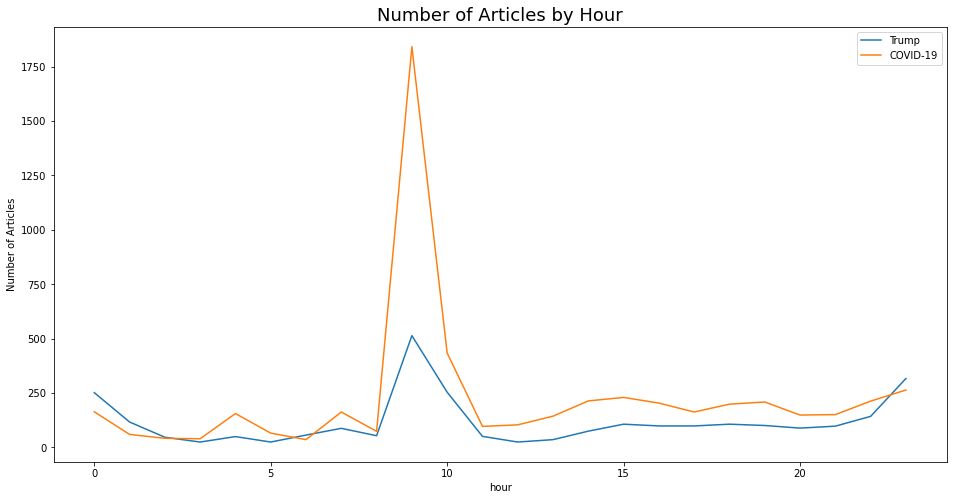

In [20]:
plt.figure(figsize=(16,8))
sns.lineplot(data=g5_data, x='hour', y='is_trump', label='Trump')
sns.lineplot(data=g5_data, x='hour', y='is_covid', label='COVID-19')
plt.ylabel('Number of Articles')
#plt.xticks(np.arange(1, 13, 1))
plt.legend()
plt.title('Number of Articles by Hour', fontsize=18);

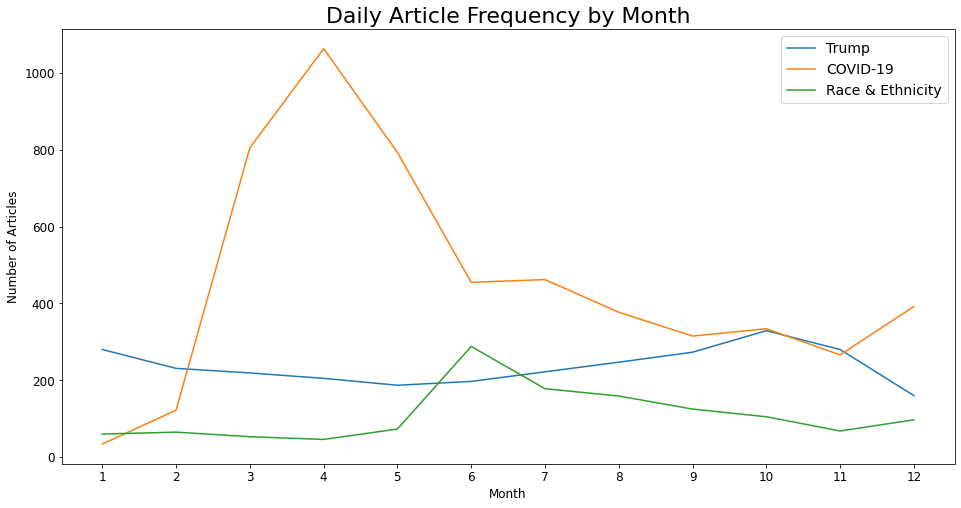

In [21]:
g1_data = full.groupby('month').sum().reset_index()
plt.figure(figsize=(16,8))
sns.lineplot(data=g1_data, x='month', y='is_trump', label='Trump')
sns.lineplot(data=g1_data, x='month', y='is_covid', label='COVID-19')
sns.lineplot(data=g1_data, x='month', y='is_racial', label='Race & Ethnicity')
plt.legend(fontsize=14)
plt.ylabel('Number of Articles', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Daily Article Frequency by Month', fontsize=22);
plt.xticks(np.arange(1,13), fontsize=12);
#plt.xlim('2020-03', '2020-05');

# Article Popularity Over Time

### Month

In [32]:
trump_data = full[full['is_trump'] > 0].groupby('month').mean()
covid_data = full[full['is_covid'] > 0].groupby('month').mean()
racial_data = full[full['is_racial'] > 0].groupby('month').mean()
re_data = full[full['is_re'] > 0].groupby('month').mean()

(0.0, 1.0)

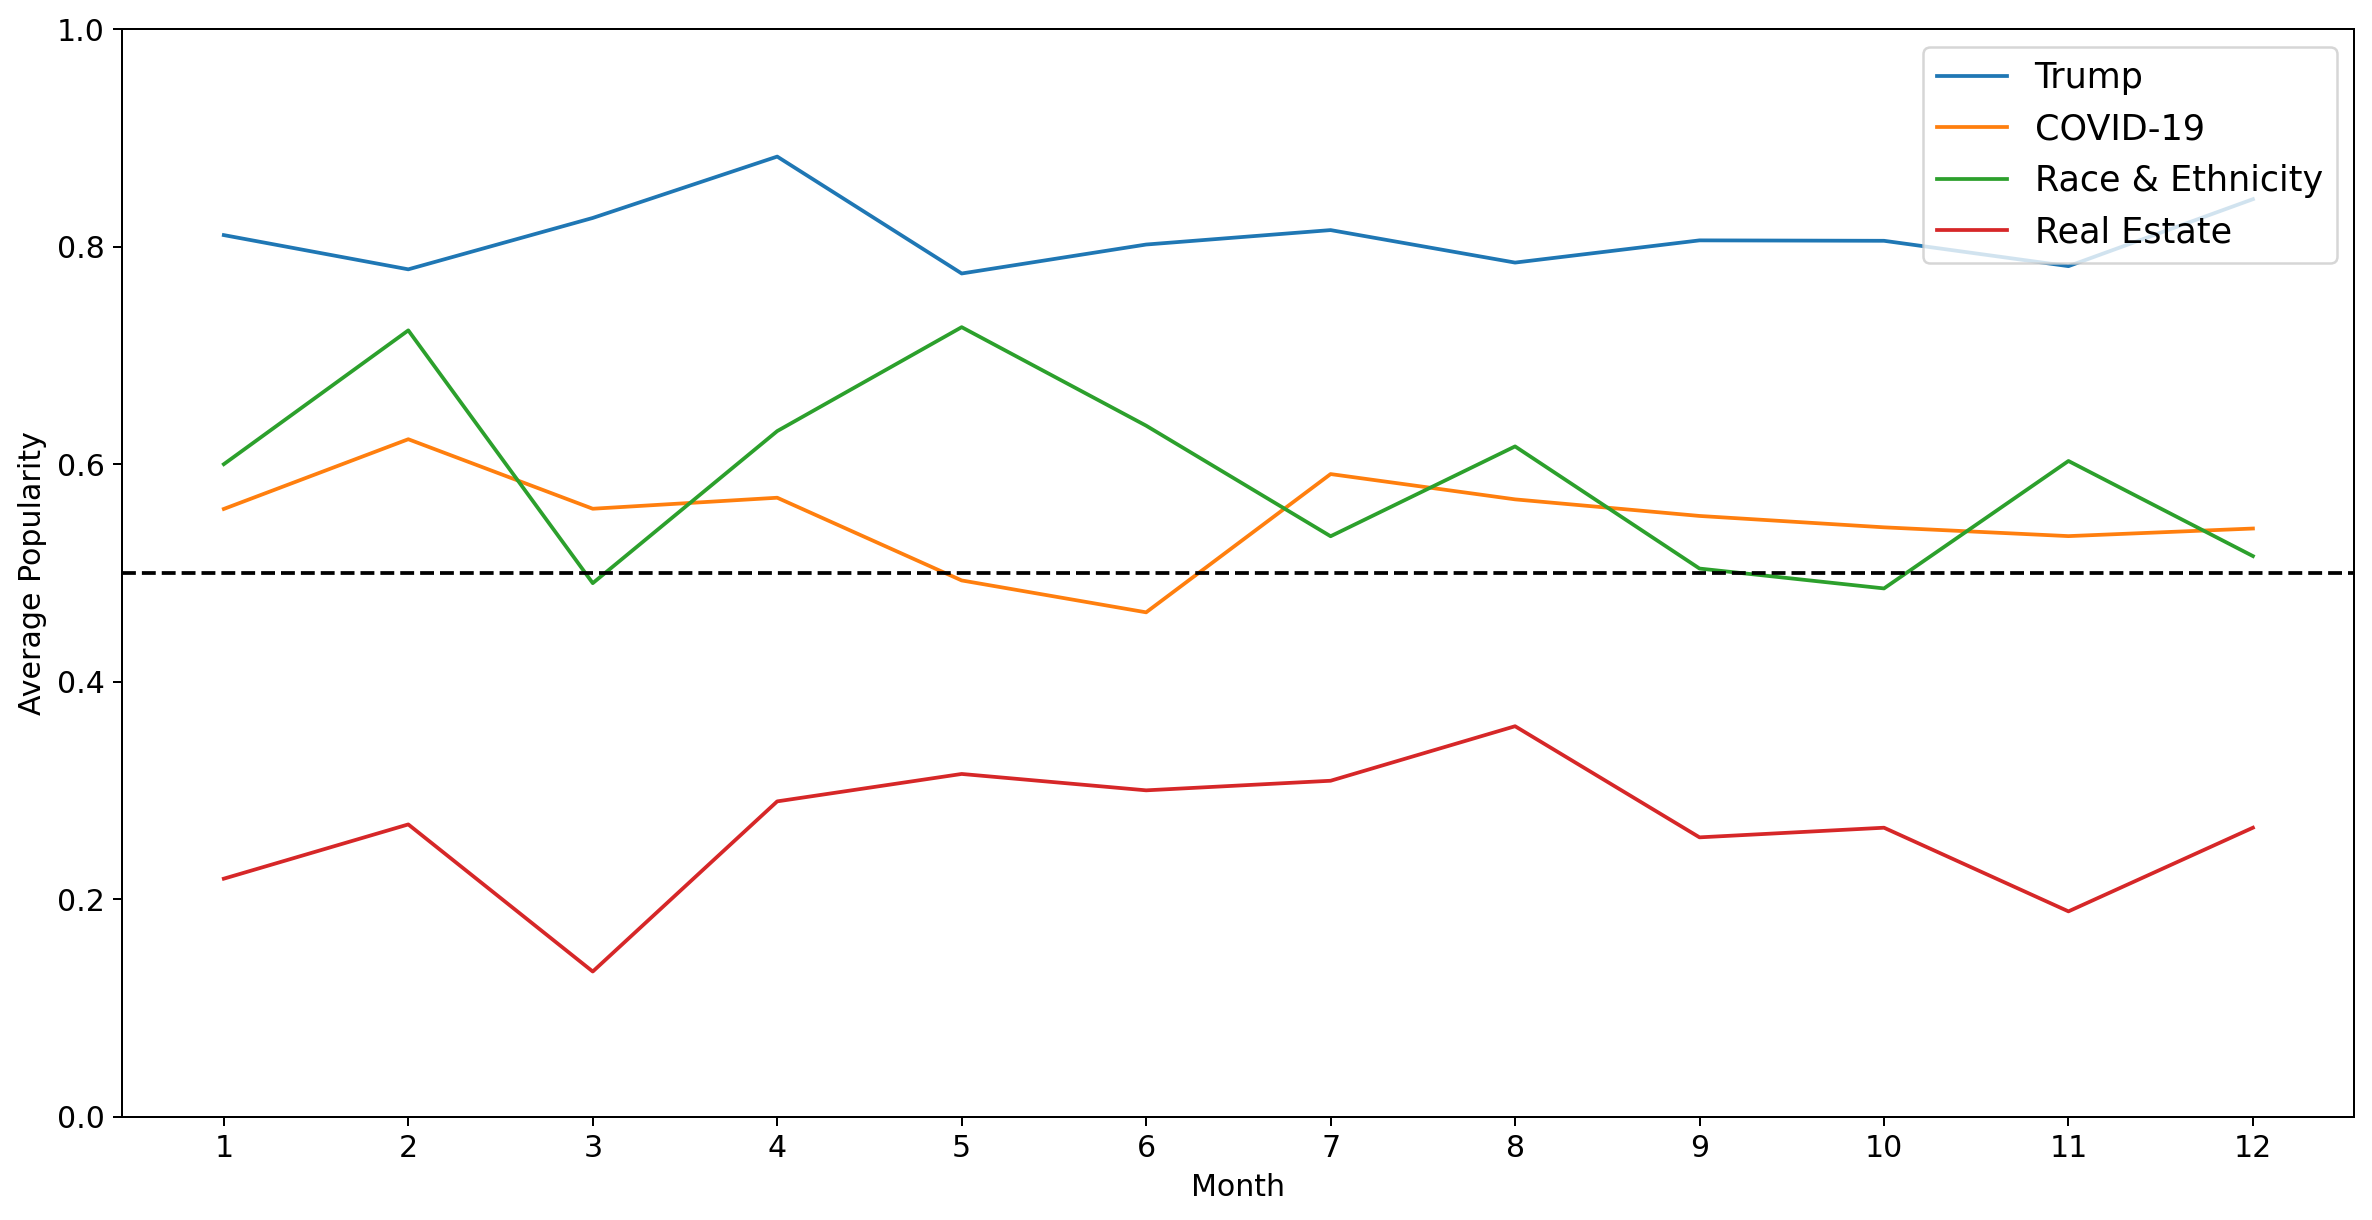

In [34]:
g1_data = full.groupby('month').mean().reset_index()
plt.figure(figsize=(16,8), dpi=180)
sns.lineplot(data=trump_data, x='month', y='is_popular', label='Trump')
sns.lineplot(data=covid_data, x='month', y='is_popular', label='COVID-19')
sns.lineplot(data=racial_data, x='month', y='is_popular', label='Race & Ethnicity')
sns.lineplot(data=re_data, x='month', y='is_popular', label='Real Estate')
plt.legend(fontsize=14, loc=1)
plt.ylabel('Average Popularity', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Month', fontsize=12)
#plt.title('Average Article Popularity by Month', fontsize=22);
plt.xticks(np.arange(1,13,1), fontsize=12);
plt.axhline(0.5, ls='--', color='black')
plt.ylim(0, 1.0)
#plt.xlim('2020-03', '2020-05');

### Daily

In [24]:
trump_data = full[(full['is_trump'] > 0) & (full['is_popular'] > 0)].groupby('month').sum()
covid_data = full[(full['is_covid'] > 0) & (full['is_popular'] > 0)].groupby('month').sum()
racial_data = full[(full['is_racial'] > 0) & (full['is_popular'] > 0)].groupby('month').sum()
re_data = full[(full['is_re'] > 0) & (full['is_popular'] > 0)].groupby('month').sum()

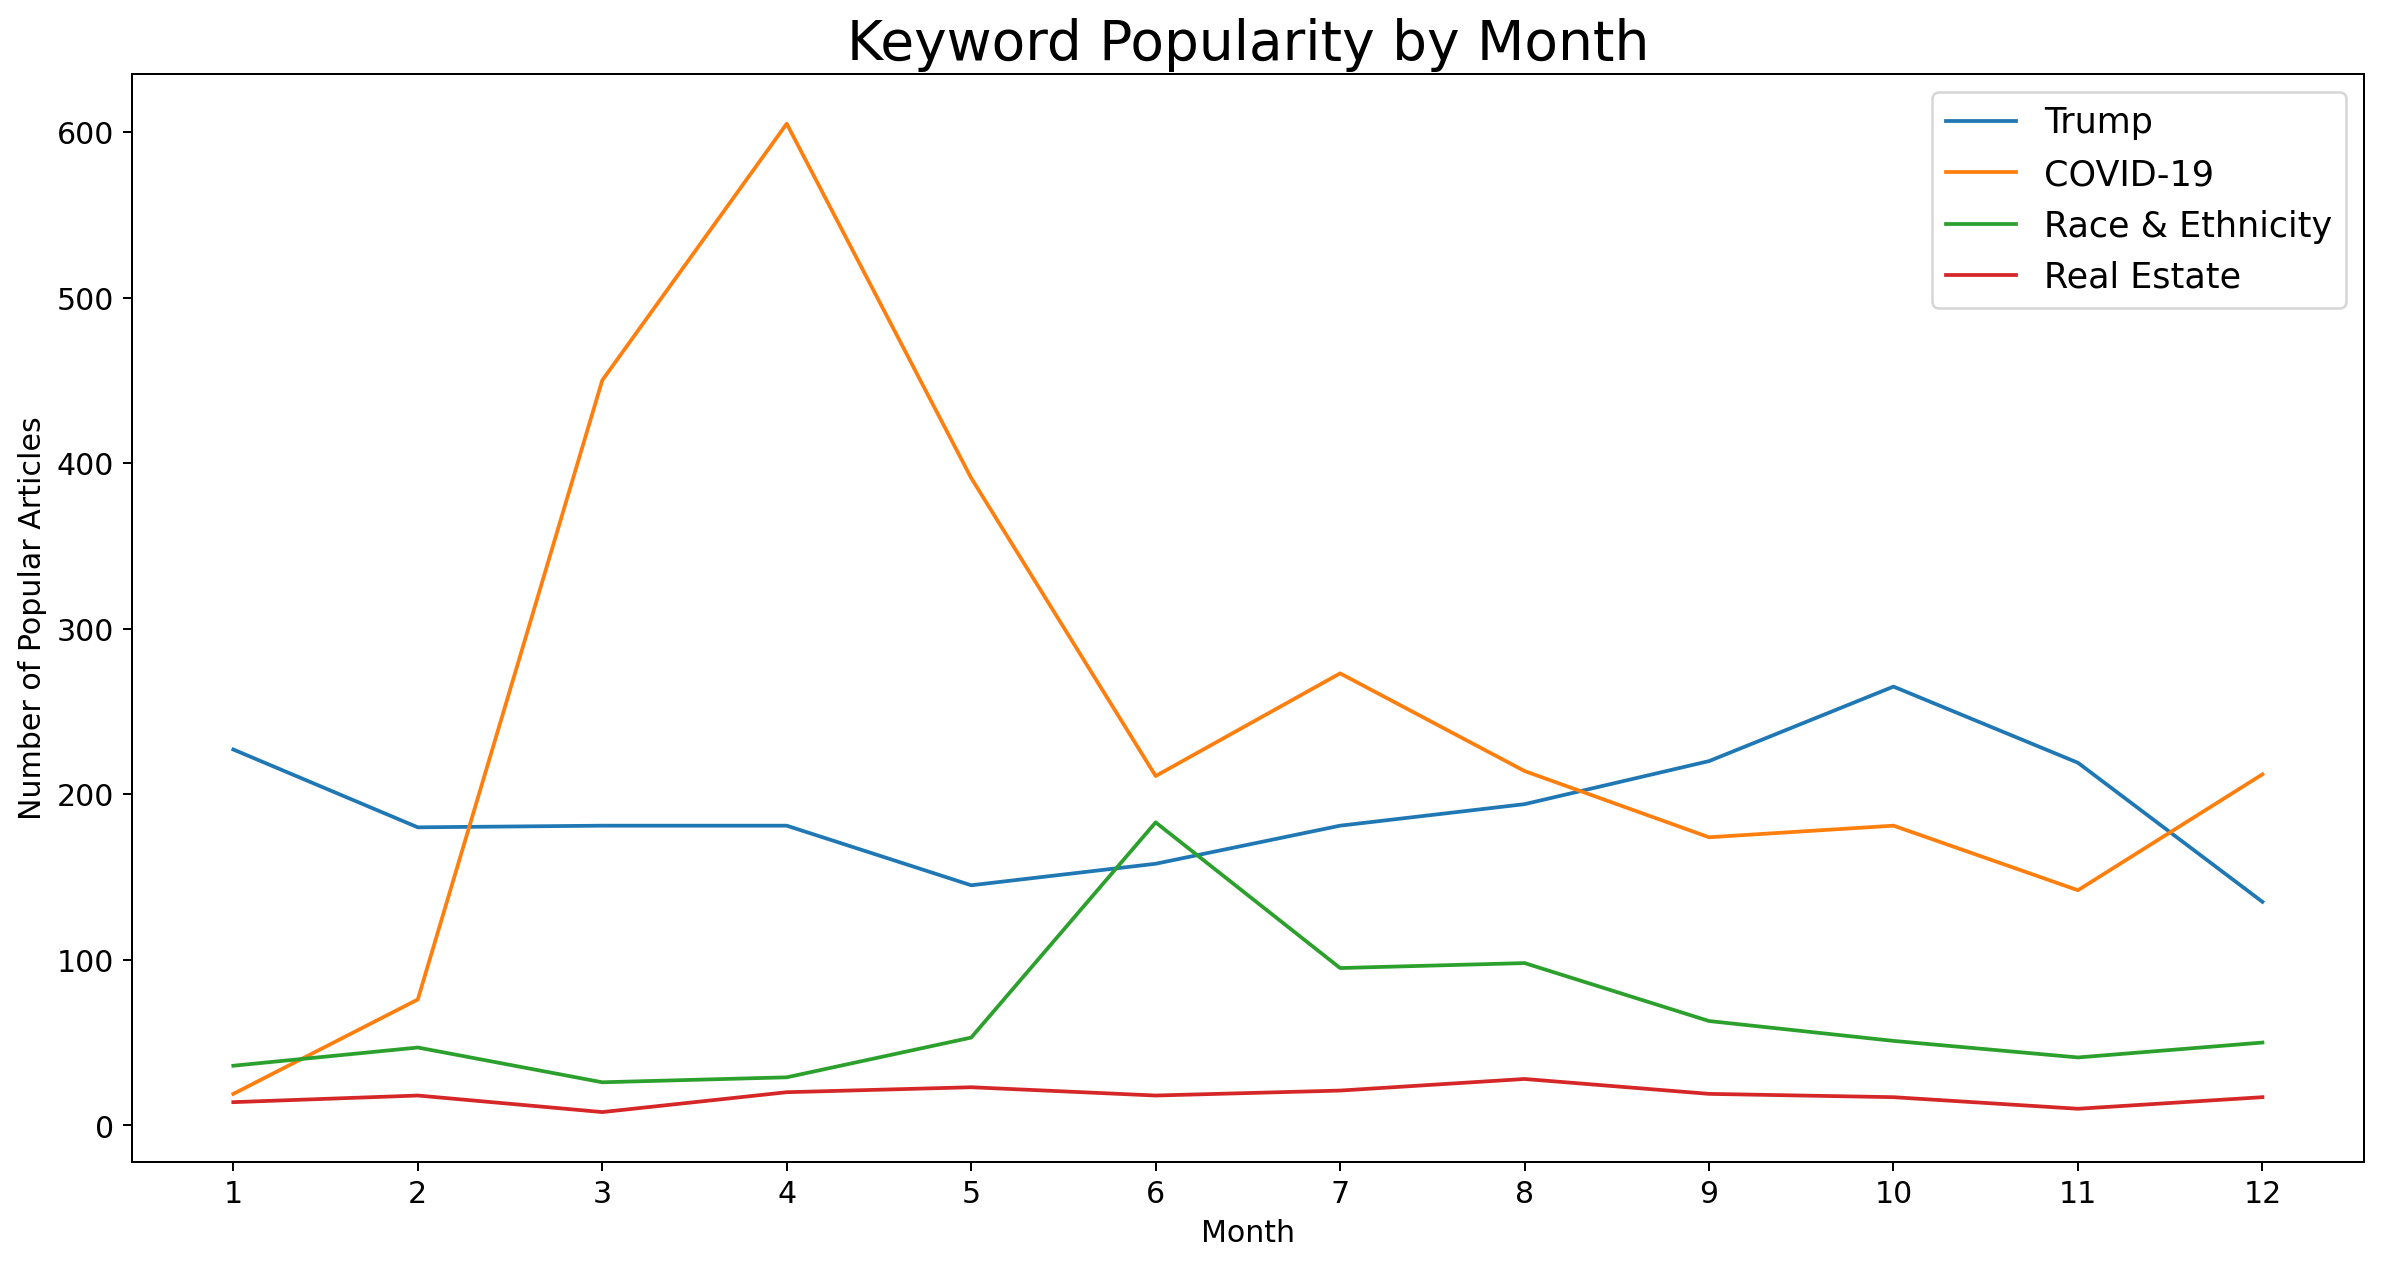

In [29]:
plt.figure(figsize=(16,8), dpi=180)
sns.lineplot(data=trump_data, x='month', y='is_popular', label='Trump')
sns.lineplot(data=covid_data, x='month', y='is_popular', label='COVID-19')
sns.lineplot(data=racial_data, x='month', y='is_popular', label='Race & Ethnicity')
sns.lineplot(data=re_data, x='month', y='is_popular', label='Real Estate')
plt.legend(fontsize=14)
plt.ylabel('Number of Popular Articles', fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.title('Keyword Popularity by Month', fontsize=22);
plt.xticks(np.arange(1,13,1), fontsize=12);
#plt.axhline(0.5, ls='--', color='black')